<a href="https://colab.research.google.com/github/Rowan-Omar/House-Pricing---Data-Analysis/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libiraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading Data & Investigating

In [ ]:
hs = pd.read_csv("kc_house_data.csv")

In [ ]:
hs.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [ ]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Our target column here is the 'price'.
We think that it will be changed according to:
* #ofBedrooms      (with direct proportional), 
* #ofBathrooms     (direct proportional),
* sqft_living      (direct proportional),
* sqft_lot         (direct proportional),
* view (direct proportional),
* lat, long (direct proportional)




sqft_lot (the area of the surrounding land)
<br/>
grade: overall grade given to the housing unit, based on King County grading system
<br/>
waterfront: Whether the house is on a waterfront
<br/>
sqft_living15: Living room area in 2015(implies some renovations)

In [ ]:
hs.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
hs.condition

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64

In [ ]:
hs['waterfront'].unique()

array([0, 1])

In [ ]:
hs['view'].unique()

array([0, 3, 4, 2, 1])

In [ ]:
# hs['location'] = pd.Series(list((hs['lat'], hs['long'])))

In [ ]:
temp = []
for x,y in zip(hs['long'],hs['lat']):
  temp.append((x,y))
hs['location'] = pd.Series(temp)

In [ ]:
hs.location

0        (-122.257, 47.5112)
1         (-122.319, 47.721)
2        (-122.233, 47.7379)
3        (-122.393, 47.5208)
4        (-122.045, 47.6168)
                ...         
21608    (-122.346, 47.6993)
21609    (-122.362, 47.5107)
21610    (-122.299, 47.5944)
21611    (-122.069, 47.5345)
21612    (-122.299, 47.5941)
Name: location, Length: 21613, dtype: object

In [ ]:
hs.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)"
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,"(-122.362, 47.5107)"
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)"
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,"(-122.069, 47.5345)"
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,"(-122.299, 47.5941)"


### Consider year at which the house is sold

In [ ]:
hs['date'] = pd.to_datetime(hs.date)

In [ ]:
hs['yr_sold'] = hs['date'].dt.year
print(hs['yr_sold'].unique())
hs

[2014 2015]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,"(-122.233, 47.7379)",2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,"(-122.045, 47.6168)",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,"(-122.362, 47.5107)",2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,"(-122.069, 47.5345)",2015


In [ ]:
print((hs['yr_built'].value_counts()).sort_index())

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64


In [ ]:
# hs[hs['yr_built'] == 2015]

### Consider the amount of renovation in 2015
#### Negative numbers means the square footage were decreased. Positive numbers implies increasing in the square footage

In [ ]:
hs['living_ren_amt2015'] = hs['sqft_living15'] - hs['sqft_living']
hs['lot_ren_amt2015'] = hs['sqft_lot15'] - hs['sqft_lot']
hs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold,lot_ren_amt2015
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",2014,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",2014,397
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,"(-122.233, 47.7379)",2015,-1938
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",2014,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,"(-122.045, 47.6168)",2015,-577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",2014,378
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,"(-122.362, 47.5107)",2015,1387
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",2014,657
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,"(-122.069, 47.5345)",2015,-1101


## Data Cleaning

##### There are no missing values to deal with
##### we have found that it is not acceptable to have #ofBathrooms and #ofFloors to be float. This may be considered as invalid data entered, so we changed it by changing its data type. And any values are rounded down. But in case of numers less than one, they were rounded up

In [ ]:
# Changing bathroom values to integer
hs.loc[hs['bathrooms']<1, 'bathrooms'] = 1

hs['bathrooms']=hs['bathrooms'].astype(dtype='int32')
hs['bathrooms']

0        1
1        2
2        1
3        3
4        2
        ..
21608    2
21609    2
21610    1
21611    2
21612    1
Name: bathrooms, Length: 21613, dtype: int32

In [ ]:
# Changing floor values to integer
hs.loc[hs['floors']<1, 'floors'] = 1

hs['floors']=hs['floors'].astype(dtype='int32')
hs['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21608    3
21609    2
21610    2
21611    2
21612    2
Name: floors, Length: 21613, dtype: int32

#### Checking if there was a renovation at year 2015 and at least the "yr_renovated" is not 0.

## Are those actually considered as invalid values in the column of "yr_renovated"?????
there are 14446 rows having this which is greater than the half of the data

In [ ]:
#invalid_ren_year = hs[(hs['living_ren_amt2015'] != 0) & (hs['lot_ren_amt2015'] != 0) & (hs['yr_renovated'] == 0)]
#invalid_ren_year.loc[:,["sqft_living","sqft_living15","sqft_lot","sqft_living15"]]

#### Checking if yr_sold is before yr_built, then it will be invalid
There are 12 records. As the year sold is just happens in (2014 and 2015), so we can change their values to 2015 (in this condition case). We cannot change the yr_built as it has low posibilities

But this data could be viewed by the concept of agreement of buying a house that is to be built in ayear in the future. So it could be viewed as correct values.

In [ ]:
invalid_yr_sold = hs[hs['yr_sold'] < hs['yr_built']]
print(invalid_yr_sold['yr_built'])
invalid_yr_sold

1763     2015
2687     2015
7526     2015
8039     2015
14489    2015
17098    2015
19805    2015
20770    2015
20852    2015
20963    2015
21262    2015
21372    2015
Name: yr_built, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold,lot_ren_amt2015
1763,1832100030,2014-06-25,597326.0,4,4,3570,8250,2,0,0,...,2015,0,98040,47.5784,-122.226,2230,10000,"(-122.226, 47.5784)",2014,1750
2687,3076500830,2014-10-29,385195.0,1,1,710,6000,1,0,0,...,2015,0,98144,47.5756,-122.316,1440,4800,"(-122.316, 47.5756)",2014,-1200
7526,9520900210,2014-12-31,614285.0,5,2,2730,6401,2,0,0,...,2015,0,98072,47.7685,-122.160,2520,6126,"(-122.16, 47.7685)",2014,-275
8039,1250200495,2014-06-24,455000.0,2,1,1200,1259,2,0,0,...,2015,0,98144,47.6001,-122.298,1320,1852,"(-122.298, 47.6001)",2014,593
14489,2770601530,2014-08-26,500000.0,2,2,1570,1269,2,0,0,...,2015,0,98199,47.6514,-122.385,1570,6000,"(-122.385, 47.6514)",2014,4731
17098,9126100346,2014-06-17,350000.0,3,2,1380,3600,3,0,0,...,2015,0,98122,47.6074,-122.305,1480,3600,"(-122.305, 47.6074)",2014,0
19805,9126100765,2014-08-01,455000.0,3,1,1320,1014,3,0,0,...,2015,0,98122,47.6047,-122.305,1380,1495,"(-122.305, 47.6047)",2014,481
20770,9310300160,2014-08-28,357000.0,5,2,2990,9240,2,0,0,...,2015,0,98133,47.7384,-122.348,1970,18110,"(-122.348, 47.7384)",2014,8870
20852,1257201420,2014-07-09,595000.0,4,3,3730,4560,2,0,0,...,2015,0,98103,47.6725,-122.330,1800,4560,"(-122.33, 47.6725)",2014,0
20963,6058600220,2014-07-31,230000.0,3,1,1040,1264,2,0,0,...,2015,0,98144,47.5951,-122.301,1350,3000,"(-122.301, 47.5951)",2014,1736


In [ ]:
#invalid_yr_sold["living_ren_amt2015"]

## EDA

In [ ]:
# Need to make it as datatype object to be excluded from numerical manipulations
hs['id']=hs['id'].astype(dtype='str')
hs['id']

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: object

#### From this heatmap, we could figure out that the target column (price) is almost high positively correlated with: **sqft_living**, **grade**, **sqft_above**, and **sqft_living**.

#### We also could find that **sqft_lot** is not much affecting the price as we thought before.

### Conclusion of this heatmap is that price (target column) is highly positive correlated with:
*  #bathrooms (relatively not much high)
* sqft_living
* grade
* sqft_above
* sqft_living15 (relatively not much high)
### And price has negative correlation with:
* living_ren_amt2015

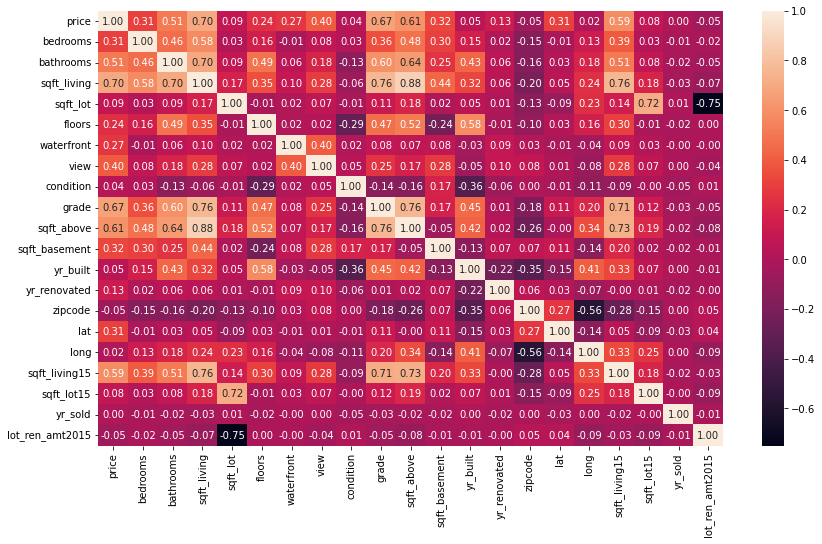

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
#x = hs.pivot()
corr = hs.corr()
sns.heatmap(corr, annot=True, fmt = '.2f', vmin=-0.75, vmax=1);

In [ ]:
sns.pairplot(data=hs)

### We found from the below scatter that the **grade** alone is not much helpful for the prediction, even if it has a high positive correlation


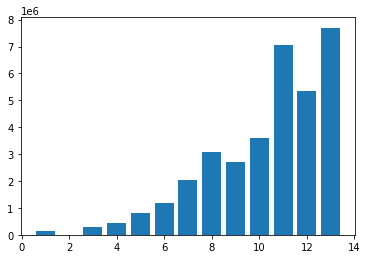

In [ ]:
plt.bar(hs["grade"], hs["price"]);

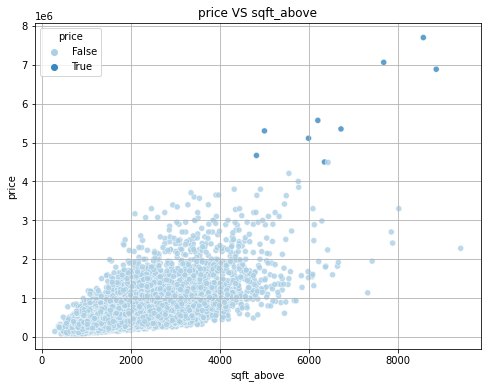

In [ ]:
plt.figure(figsize=(8,6))
plt.title("price VS sqft_above")
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.grid(True)
colors = hs.price >= 4_500_000

sns.scatterplot(x="sqft_above", y="price", data=hs,hue=colors, alpha=0.8,palette='Blues');
plt.legend((hs.price >= 4_500_000_000));

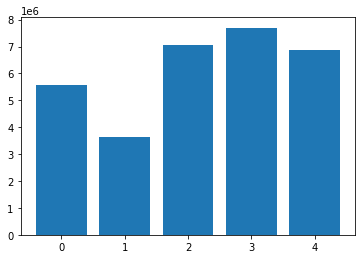

In [ ]:
plt.bar(hs["view"], hs['price']);

In [ ]:
# plt.figure(figsize=(10,6))
# plt.xlim([1895,2016])
# plt.xticks(np.arange(1900,2016,10))
# sns.scatterplot(date=hs, x='yr_built', y="price",hue="yr_sold");

In [ ]:
# It gives an error
# plt.bar(hs['yr_built'], hs['price'])

In [ ]:
# plt.hist(hs['location'])

In [ ]:
# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

# geometry = [Point(xy) for xy in zip(hs['long'], hs['lat'])]
# gdf = GeoDataFrame(hs, geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

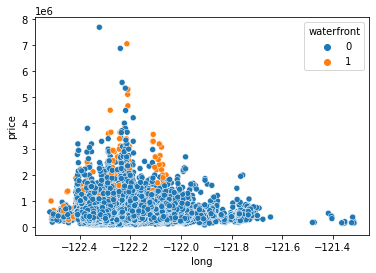

In [ ]:
sns.scatterplot(x="long",y="price",data=hs, hue='waterfront')

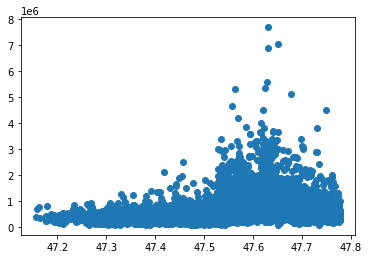

In [ ]:
plt.scatter(hs["lat"], hs["price"])

In [ ]:
#drop the columns w/ low correlation value w/ price
#hs.drop("yr_built",axis=1) #corr=0.05
hs.drop("zipcode",axis=1) #corr=-0.05
hs.drop("sqft_lot15",axis=1) #corr=
hs.drop("sqft_lot",axis=1) #corr=


,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold,lot_ren_amt2015
0,7129300520,2014-10-13,221900.0,3,1,1180,1,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",2014,0
1,6414100192,2014-12-09,538000.0,3,2,2570,2,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",2014,397
2,5631500400,2015-02-25,180000.0,2,1,770,1,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,"(-122.233, 47.7379)",2015,-1938
3,2487200875,2014-12-09,604000.0,4,3,1960,1,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",2014,0
4,1954400510,2015-02-18,510000.0,3,2,1680,1,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,"(-122.045, 47.6168)",2015,-577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,3,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",2014,378
21609,6600060120,2015-02-23,400000.0,4,2,2310,2,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,"(-122.362, 47.5107)",2015,1387
21610,1523300141,2014-06-23,402101.0,2,1,1020,2,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",2014,657
21611,291310100,2015-01-16,400000.0,3,2,1600,2,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,"(-122.069, 47.5345)",2015,-1101


In [ ]:
df=hs[hs["condition"]>=3]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold,lot_ren_amt2015
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",2014,0
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",2014,397
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,"(-122.233, 47.7379)",2015,-1938
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",2014,0
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,"(-122.045, 47.6168)",2015,-577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",2014,378
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,"(-122.362, 47.5107)",2015,1387
21610,1523300141,2014-06-23,402101.0,2,1,1020,1350,2,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",2014,657
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,"(-122.069, 47.5345)",2015,-1101


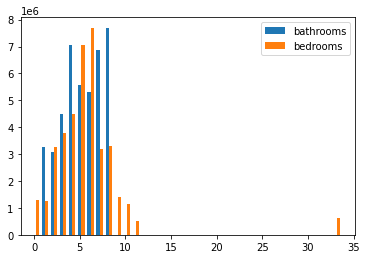

In [ ]:
ba=plt.bar(hs["bathrooms"],hs["price"],width=0.35)
bed=plt.bar(hs["bedrooms"]+0.35,hs["price"],width=0.35)
plt.legend((ba,bed),("bathrooms","bedrooms"))

### Investigating taking years sample from 1940 and 1960 that includes the max value

In [ ]:
print(hs[hs['yr_renovated']!=0]['price'].mean())
print(hs[hs['yr_renovated']==0]['price'].mean())

760379.0295404814
530360.8181554665


In [ ]:
# year_df = hs[(hs["yr_built"]>=1940) & (hs["yr_built"]<=1960)]
# plt.figure(figsize=(8,6))
# plt.bar(year_df['yr_built'], year_df['price'])
# ren_house = year_df[(year_df['yr_built']==1940) & (year_df["yr_renovated"]!= 0)]
# nonren_house = year_df[(year_df['yr_built']==1940) & (year_df["yr_renovated"]== 0)]

In [ ]:
# plt.bar(ren_house["yr_built"], ren_house["price"], width=0.2)
# plt.bar(nonren_house["yr_built"]+0.2, nonren_house["price"], width=0.2)

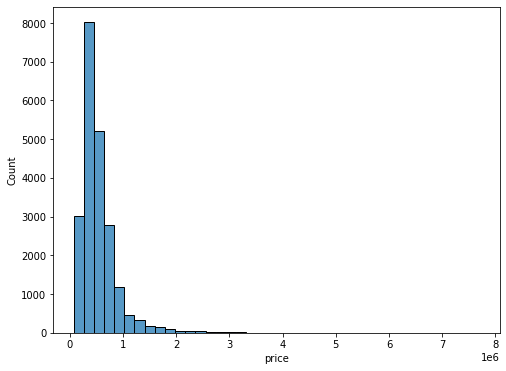

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(hs['price'], bins=40);

In [ ]:
from numpy.lib.function_base import quantile
def outlier(column):
  iqr = column.quantile(q=0.75)-column.quantile(q=0.25)
  lwr = column.quantile(q=0.75)-(1.5*iqr)
  hir = column.quantile(q=0.75)+(1.5*iqr)
  return (lwr,hir)

out = hs['price'].agg(outlier)
print(out)
price_outliar = hs[(hs['price']<out[0]) | (hs['price']>out[1])]
price_outliar

# l = (hs.columns[2:]).remove('location')
# temp_dict = {}
# for col in l:
#   temp_dict[col] = hs[col].agg(outlier)

# temp_dict
# quantile_validation = 

(160425.0, 1129575.0)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold,lot_ren_amt2015,living_ren_amt2015
5,7237550310,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,...,0,98053,47.6561,-122.005,4760,101930,"(-122.005, 47.6561)",2014,0,-660
21,2524049179,2014-08-26,2000000.0,3,2,3050,44867,1,0,4,...,0,98040,47.5316,-122.233,4110,20336,"(-122.233, 47.5316)",2014,-24531,1060
49,822039084,2015-03-11,1350000.0,3,2,2753,65005,1,1,2,...,0,98070,47.4041,-122.451,2680,72513,"(-122.451, 47.4041)",2015,7508,-73
69,1802000060,2014-06-12,1325000.0,5,2,3200,20158,1,0,0,...,0,98004,47.6303,-122.215,3390,20158,"(-122.215, 47.6303)",2014,0,190
92,4168000060,2015-02-26,153000.0,3,1,1200,10500,1,0,0,...,0,98023,47.3220,-122.351,1350,10500,"(-122.351, 47.322)",2015,0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,2015-01-30,1700000.0,4,3,3830,8963,2,0,0,...,0,98004,47.5990,-122.197,2190,10777,"(-122.197, 47.599)",2015,1814,-1640
21576,9253900271,2015-01-07,3567000.0,5,4,4850,10584,2,1,4,...,0,98008,47.5943,-122.110,3470,18270,"(-122.11, 47.5943)",2015,7686,-1380
21590,7430200100,2014-05-14,1222500.0,4,3,4910,9444,1,0,0,...,0,98074,47.6502,-122.066,4560,11063,"(-122.066, 47.6502)",2014,1619,-350
21597,191100405,2015-04-21,1575000.0,4,3,3410,10125,2,0,0,...,0,98040,47.5653,-122.223,2290,10125,"(-122.223, 47.5653)",2015,0,-1120


In [ ]:
# pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 26.0 MB/s 
     |████████████████████████████████| 6.3 MB 38.0 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.2 MB/s 


In [ ]:
# import os
# os.environ['PROJ_LIB'] = r'C:\Users\El-Wattaneya\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

In [ ]:
 from mpl_toolkits.basemap import Basemap

In [ ]:
# pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

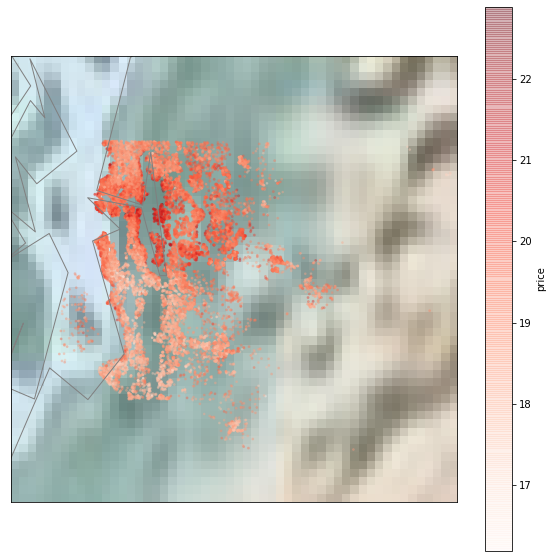

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))

#m = Basemap(projection='cyl', resolution='h',llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180,)
m=Basemap(projection='lcc',resolution='l',lat_0=47.5,lon_0=-122,width=0.1E6,height=0.1E6)

m.shadedrelief(scale=2)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(hs["long"], hs["lat"], latlon=True,
          c=np.log2(hs["price"]), s=np.log10(hs["sqft_living"]),
        cmap='Reds', alpha=0.3, marker='o')

# 3. create colorbar and legend
plt.colorbar(label=r'price')
#plt.clim(3, 7)